# Proyek Machine Learning - Model Klasifikasi Drug-Target Interaction (DTI) Pada Biomolekul Enzyme
# Data Diri

- Nama : Said Thaufik Rizaldi
- Jenis Kelamin : Laki-Laki
- Email : saidthaufik24@gmail.com
- Kota Domisili : Bogor
- Jalur : Educators 2024

# Import Library

In [2]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sampling dan Imbalance Handling
#from imblearn.over_sampling import SMOTE
#from collections import Counter

# Preprocessing
from sklearn.preprocessing import PowerTransformer

# Model Selection dan Validation
from sklearn.model_selection import train_test_split, GridSearchCV

# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

# Deep Learning dengan TensorFlow/Keras
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Metrics untuk Evaluasi Model
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Utilities
from itertools import product

# Import Data 

In [ ]:
# Load data mengambil dari web
binary_data = pd.read_csv('http://web.kuicr.kyoto-u.ac.jp/supp/yoshi/drugtarget/bind_orfhsa_drug_e.txt', 
                          sep='\t', header=None, names=['Protein_ID', 'Compound_ID'])
compound_data = pd.read_csv('http://web.kuicr.kyoto-u.ac.jp/supp/yoshi/drugtarget/e_simmat_dc.txt', 
                            sep='\t', index_col=0)
protein_data = pd.read_csv('http://web.kuicr.kyoto-u.ac.jp/supp/yoshi/drugtarget/e_simmat_dg.txt', 
                           sep='\t', index_col=0)

In [3]:
binary_data = pd.read_csv('D:/projek/dti/binary_enzyme.txt', sep='\t', header=None, names=['Protein_ID', 'Compound_ID'])
compound_data = pd.read_csv('D:/projek/dti/compound_enzyme.txt', sep='\t', index_col=0)
protein_data = pd.read_csv('D:/projek/dti/protein_enzyme.txt', sep='\t', index_col=0)

In [4]:
binary_data

,Protein_ID,Compound_ID
0,hsa:10,D00002
1,hsa:10,D00448
2,hsa:100,D00037
3,hsa:100,D00155
4,hsa:10056,D00021
...,...,...
2921,hsa:9647,D00107
2922,hsa:9647,D00184
2923,hsa:983,D02880
2924,hsa:9945,D00332


berhasil _import_ data interaksi antara senyawa dan protein dengan nama `binary_data`

In [6]:
compound_data

,D00002,D00005,D00007,D00014,D00018,D00021,D00027,D00029,D00032,D00035,...,D04092,D04197,D04292,D04966,D04983,D05341,D05353,D05407,D05458,D06238
D00002,1.000000,0.515625,0.038462,0.084746,0.098039,0.120000,0.083333,0.090909,0.100000,0.019608,...,0.148148,0.196078,0.140351,0.019231,0.039216,0.033333,0.166667,0.215686,0.122449,0.203390
D00005,0.469697,1.000000,0.032787,0.073529,0.083333,0.083333,0.109091,0.095238,0.084746,0.016667,...,0.145161,0.206897,0.156250,0.050847,0.050847,0.059701,0.215385,0.203390,0.122807,0.212121
D00007,0.038462,0.032787,1.000000,0.428571,0.100000,0.375000,0.000000,0.238095,0.400000,0.200000,...,0.272727,0.038462,0.000000,0.055556,0.583333,0.217391,0.058824,0.120000,0.105263,0.057143
D00014,0.084746,0.073529,0.428571,1.000000,0.066667,0.230769,0.000000,0.200000,0.240000,0.120000,...,0.187500,0.027778,0.000000,0.074074,0.318182,0.225806,0.045455,0.151515,0.068966,0.068182
D00018,0.098039,0.083333,0.100000,0.066667,1.000000,0.090909,0.000000,0.076923,0.095238,0.052632,...,0.071429,0.160000,0.064516,0.000000,0.105263,0.034483,0.027027,0.153846,0.045455,0.026316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D05341,0.033333,0.059701,0.217391,0.225806,0.034483,0.153846,0.000000,0.259259,0.160000,0.130435,...,0.200000,0.029412,0.026316,0.038462,0.285714,1.000000,0.047619,0.125000,0.074074,0.046512
D05353,0.166667,0.215385,0.058824,0.045455,0.027027,0.151515,0.172414,0.024390,0.121212,0.000000,...,0.257143,0.162162,0.205128,0.060606,0.093750,0.047619,1.000000,0.222222,0.233333,0.394737
D05407,0.215686,0.203390,0.120000,0.151515,0.153846,0.111111,0.181818,0.133333,0.160000,0.000000,...,0.241379,0.296296,0.147059,0.038462,0.125000,0.125000,0.222222,1.000000,0.115385,0.216216
D05458,0.122449,0.122807,0.105263,0.068966,0.045455,0.533333,0.187500,0.038462,0.294118,0.000000,...,0.380952,0.076923,0.185185,0.176471,0.176471,0.074074,0.233333,0.115385,1.000000,0.266667


berhasil _import_ data awal matrix senyawa dengan nama `compound_data`

In [7]:
protein_data

,hsa10,hsa100,hsa10056,hsa1017,hsa1018,hsa10188,hsa1019,hsa1020,hsa1021,hsa1022,...,hsa94,hsa94009,hsa9420,hsa9563,hsa9601,hsa9641,hsa9647,hsa983,hsa9945,hsa9955
hsa10,1.000000,0.025752,0.021575,0.019325,0.026672,0.015293,0.023486,0.024367,0.022866,0.019767,...,0.019632,0.028608,0.017627,0.020426,0.020441,0.013571,0.023501,0.023542,0.020124,0.020689
hsa100,0.025752,1.000000,0.018325,0.025940,0.027021,0.018789,0.020570,0.024986,0.019592,0.022743,...,0.013435,0.024512,0.020331,0.014956,0.019223,0.014218,0.017710,0.025189,0.017704,0.023529
hsa10056,0.021575,0.018325,1.000000,0.016285,0.020771,0.008854,0.017779,0.016979,0.016272,0.017750,...,0.012600,0.016026,0.015888,0.012553,0.016025,0.015311,0.013789,0.017116,0.016019,0.016563
hsa1017,0.019325,0.025940,0.016285,1.000000,0.772951,0.070544,0.411930,0.594324,0.441991,0.422905,...,0.063237,0.030118,0.017832,0.023890,0.017143,0.082550,0.022033,0.671069,0.016540,0.023461
hsa1018,0.026672,0.027021,0.020771,0.772951,1.000000,0.068541,0.433581,0.604547,0.442158,0.422192,...,0.050892,0.034574,0.020715,0.021216,0.018322,0.079097,0.018170,0.661582,0.015700,0.023216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hsa9641,0.013571,0.014218,0.015311,0.082550,0.079097,0.035231,0.083366,0.082405,0.082108,0.085491,...,0.039425,0.015683,0.014635,0.013157,0.012944,1.000000,0.018591,0.069888,0.012523,0.012494
hsa9647,0.023501,0.017710,0.013789,0.022033,0.018170,0.013726,0.019645,0.017107,0.017956,0.017747,...,0.014207,0.022953,0.013829,0.018127,0.023350,0.018591,1.000000,0.016835,0.012862,0.020058
hsa983,0.023542,0.025189,0.017116,0.671069,0.661582,0.069185,0.391654,0.554619,0.425902,0.400749,...,0.060188,0.021823,0.020676,0.016028,0.019668,0.069888,0.016835,1.000000,0.018004,0.018888
hsa9945,0.020124,0.017704,0.016019,0.016540,0.015700,0.010667,0.015589,0.018870,0.015501,0.016556,...,0.011753,0.023433,0.013260,0.012531,0.015638,0.012523,0.012862,0.018004,1.000000,0.014591


berhasil _import_ data awal matrix protein dengan nama `protein_data`

# **Data Understanding**  
Dataset ini dikenal sebagai **Yamanishi 2008** yang berisi informasi tentang interaksi biomolekuler antara enzim (protein) dan senyawa kimia. Dataset ini diperkenalkan oleh **Yamanishi et al. (2008)** dalam studi tentang prediksi interaksi _protein-ligand_ menggunakan integrasi data kimia dan genomik.  

Fokus penelitian ini adalah __menganalisis hubungan spesifik antara enzim dengan senyawa__ melalui data fitur numerik yang relevan. Namun, dataset-dataset ini masih bersifat mentah atau belum mendukung pengembangan model _machine learning_ sehingga perlu di lakukan analisa lebih lanjut pada proses ini.


**Sumber Data**  
Dataset ini menggabungkan tiga sumber data utama:  

- **Interaction Data** (`bind_orfhsa_drug_e.txt`)  
    - Data ini menyimpan pasangan interaksi positif antara enzim dan senyawa.  
    - Fitur pada dataset ini:  
        - **`Protein_ID`**: ID enzim yang diidentifikasi dengan prefix _hsa:_.  
        - **`Compound_ID`**: ID senyawa yang berinteraksi dengan enzim.   

- **Compound Features Data** (`e_simmat_dc.txt`)  
    - Menggambarkan karakteristik kimiawi dari setiap senyawa.  
    - Fitur pada dataset ini:  
        - Dimodelkan sebagai __matriks kesamaan__ (_similarity matrix_) dari **Compound_ID**.
        - Menunjukkan hubungan antar senyawa berdasarkan kesamaan struktural dan kimiawi.  
        - Terdiri dari __445 fitur__ yang diekstrak dari _generate_ fitur SIMCOMP (_Simultaneous Comparisons for Multiple Endpoints_) _score_
        - contoh dari fitur data: `D00002`, `D00005`, `D00007` dan seterusnya

- **Protein Features Data** (`e_simmat_dg.txt`)  
    - Menggambarkan karakteristik biologis dari setiap enzim.  
    - Fitur pada dataset ini:  
        - Dimodelkan sebagai __matriks kesamaan__ dari **Protein_ID**.  
        - Merepresentasikan kemiripan antar enzim berdasarkan struktur dan fungsi.  
        - Terdiri dari __664 fitur__ yang dihasilkan dari analisis genomik dan struktur protein yang diekstrak dari _generate_ proses fitur SmithWaterman _score_.  
        - contoh dari fitur data: `hsa10`, `hsa100`, `hsa10056` dan seterusnya

**Akses Data**  
Data ini dapat diakses secara terbuka pada link berikut:  
[Yamanishi Dataset](http://web.kuicr.kyoto-u.ac.jp/supp/yoshi/drugtarget/)  

## Exploratory Data Analysis (EDA)
Setelah melakukan _import_ Data, EDA bertujuan untuk memberikan wawasan awal tentang data yang akan dianalisis, sehingga mempermudah dalam menentukan langkah-langkah selanjutnya, seperti pembersihan data, transformasi, atau pengembangan model. Dengan analisis statistik, EDA membantu memahami struktur data secara lebih mendalam dan memastikan data siap untuk proses analisis lebih lanjut

### Dataset Interaction Data (`bind_orfhsa_drug_e.txt`) 

In [6]:
# Melihat dimensi data
print(binary_data.shape)

(2926, 2)


Berdasarkan _output_ diatas dataset memiliki **2926 baris** dan **2 kolom**. Pada bagian ini, belum dapat diketahui nama dari kolom-kolom yang ada

In [7]:
# Melihat tipe data
print(binary_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2926 entries, 0 to 2925
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Protein_ID   2926 non-null   object
 1   Compound_ID  2926 non-null   object
dtypes: object(2)
memory usage: 45.8+ KB
None


Berdasarkan _output_ diatas, fitur `Protein_ID` dan `Compound_ID` memilki _data type_ berbentuk `object` 

In [8]:
# Melihat jumlah nilai unik
print("Unique Protein_ID:", binary_data['Protein_ID'].nunique())
print("Unique Compound_ID:", binary_data['Compound_ID'].nunique())

Unique Protein_ID: 664
Unique Compound_ID: 445


Berdasarkan _output_ diatas, terdapat nilai _unique_ yang sesuai dengan penjelasan **Data Understanding** diatas:
-  `Protein_ID`: 664 data
-  `Compound_ID`: 445 data

Agar lebih tervisualkan dengan baik, akan dilakukan **Visualisasi Data** dengan histogram

In [10]:
# Memeriksa missing value di dataset
missing_values = binary_data.isnull().sum()
print("Jumlah missing values per kolom:")
print(missing_values)

Jumlah missing values per kolom:
Protein_ID     0
Compound_ID    0
dtype: int64


Berdasarkan _output_ diatas, tidak terdapat nilai _missing value_ terhadap semua kolom atau fitur

In [12]:
# Memeriksa duplikasi dalam dataset
duplicate_rows = binary_data[binary_data.duplicated()]
num_duplicates = duplicate_rows.shape[0]
print(f"Jumlah baris duplikat: {num_duplicates}")

Jumlah baris duplikat: 0


Berdasarkan _output_ diatas, tidak terdapat nilai duplikat terhadap semua kolom atau fitur

#### Visualisasi Data
Teknik visualisasi digunakan untuk memberikan pemahaman yang lebih mendalam terhadap pola-pola data yang ditemukan yakni persebaran data dari `Protein_ID` dan `Compound_ID`

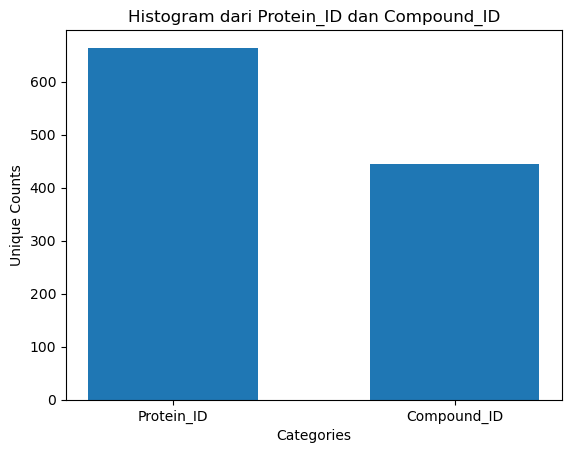

In [11]:
# Data for the histogram

unique_protein_count = binary_data['Protein_ID'].nunique()
unique_compound_count = binary_data['Compound_ID'].nunique()

categories = ['Protein_ID', 'Compound_ID']
counts = [unique_protein_count, unique_compound_count]

plt.bar(categories, counts, width=0.6)
plt.xlabel('Categories')
plt.ylabel('Unique Counts')
plt.title('Histogram dari Protein_ID dan Compound_ID')
plt.show()

Berdasarkan hasil histrogram diatas bahwa `Protein_ID` lebih memiliki data yang signifikan terhadap `Compound_ID`

### Dataset Compound Features (`e_simmat_dc.txt`) 

In [17]:
# Periksa dimensi
print(f"Dimensi dataset: {compound_data.shape}")

Dimensi dataset: (445, 445)


Berdasarkan _output_ diatas, dimensi data adalah **445 Baris X 445 Kolom**

In [21]:
# Periksa missing values
missing_values = compound_data.isnull().sum().sum()
print(f"Jumlah nilai yang hilang: {missing_values}")

Jumlah nilai yang hilang: 0


Berdasarkan _output_ diatas, tidak terdapat nilai _missing value_ terhadap semua kolom atau fitur

In [23]:
# Sparsity analysis
total_elements = compound_data.size
non_zero_elements = (compound_data != 0).sum().sum()
sparsity = 100 * (1 - non_zero_elements / total_elements)
print(f"Sparsity matriks: {sparsity:.2f}%")

Sparsity matriks: 4.03%


Sparsity matriks adalah **4.03%, itu berarti 95.97% dari elemen matriks memiliki nilai**, menunjukkan bahwa matriks ini tidak terlalu _sparse_ (jarang). Sehingga, memungkinkan analisis langsung.

In [25]:
# Menampilkan nilai min, max, dan mean untuk setiap kolom
min_values = compound_data.min().min()
max_values = compound_data.max().max()
mean_values = compound_data.mean().mean()

print(f"Nilai minimum dalam dataset: {min_values}")
print(f"Nilai maksimum dalam dataset: {max_values}")
print(f"Rata-rata nilai dalam dataset: {mean_values}")

Nilai minimum dalam dataset: 0.0
Nilai maksimum dalam dataset: 1.0
Rata-rata nilai dalam dataset: 0.1721487835778312


Berdasarkan _output_ diatas bahwah 
- nilai minimum dari dataset `compound_data` adalah 0
- nilai maksimum dari dataset `compond_data` adalah 1
- nilai rata-rata dari dataset `compund_data` adalah 0,172

Sehingga kesimpulannya, dataset ini aman untuk dilakukan analisis lebih lanjut karena memiliki rentang 0-1

#### Visualisasi Data
Teknik visualisasi digunakan untuk memberikan pemahaman yang lebih mendalam terhadap pola-pola data yang ditemukan. Dalam hal ini melakukan pengecekan distribusi dari data kesamaan antar senyawa.

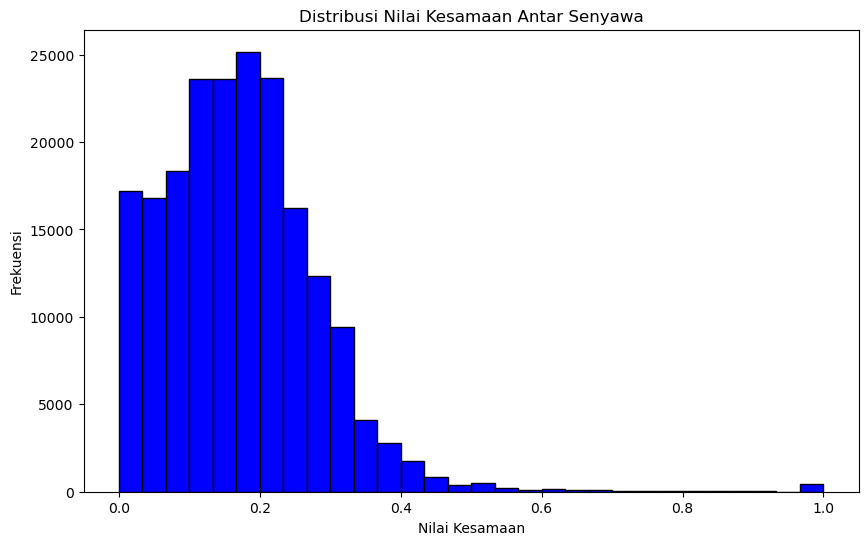

In [33]:
# Distribusi Nilai Kesamaan Senyawa pada Compound Data
flattened_values = compound_data.values.flatten()
plt.figure(figsize=(10, 6))
plt.hist(flattened_values, bins=30, color='blue', edgecolor='black')
plt.title("Distribusi Nilai Kesamaan Antar Senyawa")
plt.xlabel("Nilai Kesamaan")
plt.ylabel("Frekuensi")
plt.show()

Berdasarkan _output_ diatas, distribusi data `compound_data_ **sangat miring ke kanan (_positively skewed_)**. Distribusi seperti ini dapat menyebabkan masalah pada algoritma _machine learning_ yang mengasumsikan **distribusi normal (Gaussian)**, serta membuat model rentan terhadap **bias** akibat _outlier_. Sehingga penangannya adalah Transformasi Data yang akan dilakukan pada **Data Preparation**

### Protein Features Data (`e_simmat_dg.txt`) 

In [27]:
# Periksa dimensi
print(f"Dimensi dataset: {protein_data.shape}")

Dimensi dataset: (664, 664)


Berdasarkan _output_ diatas, dimensi data adalah **664 Baris X 664 Kolom**

In [29]:
# Periksa missing values
missing_values = protein_data.isnull().sum().sum()
print(f"Jumlah nilai yang hilang: {missing_values}")

Jumlah nilai yang hilang: 0


Berdasarkan _output_ diatas, tidak terdapat nilai _missing value_ terhadap semua kolom atau fitur

In [31]:
# Sparsity analysis
total_elements = protein_data.size
non_zero_elements = (protein_data != 0).sum().sum()
sparsity = 100 * (1 - non_zero_elements / total_elements)
print(f"Sparsity matriks: {sparsity:.2f}%")

Sparsity matriks: 0.00%


Sparsity matriks adalah **0%, itu berarti 100% dari elemen matriks memiliki nilai**. Sehingga, memungkinkan analisis langsung.

In [32]:
# Menampilkan nilai min, max, dan mean untuk setiap kolom
min_values = compound_data.min().min()
max_values = compound_data.max().max()
mean_values = compound_data.mean().mean()

print(f"Nilai minimum dalam dataset: {min_values}")
print(f"Nilai maksimum dalam dataset: {max_values}")
print(f"Rata-rata nilai dalam dataset: {mean_values}")

Nilai minimum dalam dataset: 0.0
Nilai maksimum dalam dataset: 1.0
Rata-rata nilai dalam dataset: 0.1721487835778312


Berdasarkan _output_ diatas bahwah 
- nilai minimum dari dataset `protein_data` adalah 0
- nilai maksimum dari dataset `protein_data` adalah 1
- nilai rata-rata dari dataset `protein_data` adalah 0,172

Sehingga kesimpulannya, dataset ini aman untuk dilakukan analisis lebih lanjut karena memiliki rentang 0-1

#### Visualisasi Data
Teknik visualisasi digunakan untuk memberikan pemahaman yang lebih mendalam terhadap pola-pola data yang ditemukan. Dalam hal ini melakukan pengecekan distribusi dari data kesamaan antar protein.

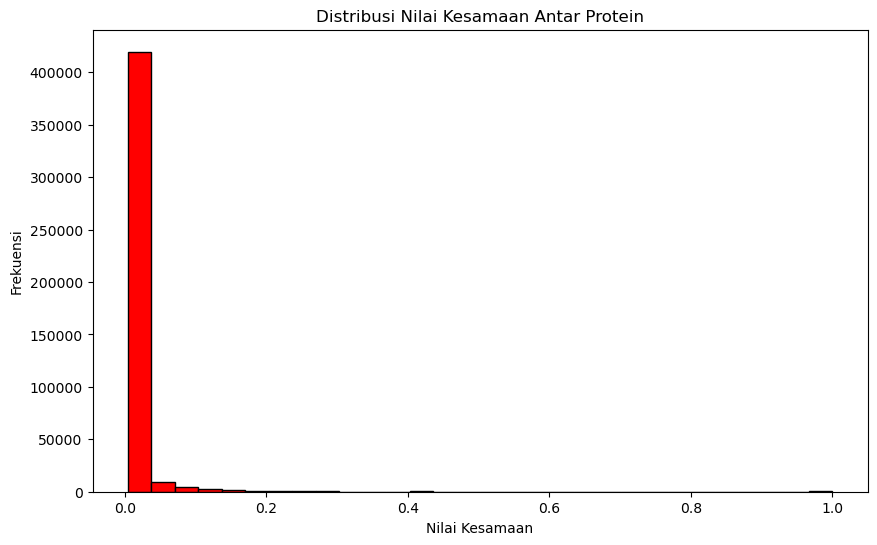

In [38]:
# Distribusi Nilai Kesamaan Senyawa pada Protein Data
flattened_values = protein_data.values.flatten()
plt.figure(figsize=(10, 6))
plt.hist(flattened_values, bins=30, color='red', edgecolor='black')
plt.title("Distribusi Nilai Kesamaan Antar Protein")
plt.xlabel("Nilai Kesamaan")
plt.ylabel("Frekuensi")
plt.show()

Sama seperti _output_ sebelumnya **sangat miring ke kanan (_positively skewed_)**, sehingga penangannya adalah Transformasi data yang akan dilakukan di **Data Preparation**

# Data Preparation

## **Proses Penggabungan Data**
Dataset ini saat ini masih terbagi menjadi tiga bagian utama, yaitu **Interaction Data**, **Compound Features Data**, dan **Protein Features Data** (dapat dilihat saat proses _import data_). Ketiga bagian tersebut menyimpan informasi yang saling melengkapi, namun belum terintegrasi menjadi satu _dataset_ yang utuh dan siap digunakan.

Penggabungan diperlukan karena:  
- **Interaction Data** hanya menyediakan pasangan interaksi antara enzim dan senyawa tanpa detail fitur.  
- **Compound Features Data** berisi deskripsi kimiawi dari senyawa, tetapi tidak memiliki informasi tentang interaksi atau enzim yang relevan.  
- **Protein Features Data** menyimpan karakteristik biologis enzim, tetapi juga terpisah dari informasi senyawa
Agar model machine learning dapat memahami hubungan antara senyawa dan enzim, semua fitur ini harus digabungkan menjadi satu dataset yang saling terhubung. Adapun tahapan Proses Penggabungan Data melibatkan beberapa langkah sebagai berikut:
#### **1. Proses _Key Matching_**  

Pada tahap ini, dilakukan penggabungan dataset: 
- **Interaction Data** yang sudah di _assign_ sebagai variabel `binary_data`
- **Compound Features Data** yang sudah di _assign_ sebagai variabel `protein_data`, dan;
- **Protein Features Data** yang sudah di _assign_ sebagai variabel `compound_data`

berdasarkan `Protein_ID` dan `Compound_ID` untuk menghasilkan satu dataset yang terintegrasi. Proses ini melibatkan beberapa langkah sebagai berikut:  

- **1.1. Menambahkan Label Positif**
    - Setiap pasangan `Protein_ID` dan `Compound_ID` di dataset **Interaction Data** merupakan interaksi positif.
    - Label dengan nilai **1** ditambahkan untuk menandai pasangan ini sebagai data positif.  

In [45]:
# Tambahkan label positif
binary_data['Label'] = 1

In [46]:
binary_data

,Protein_ID,Compound_ID,Label
0,hsa:10,D00002,1
1,hsa:10,D00448,1
2,hsa:100,D00037,1
3,hsa:100,D00155,1
4,hsa:10056,D00021,1
...,...,...,...
2921,hsa:9647,D00107,1
2922,hsa:9647,D00184,1
2923,hsa:983,D02880,1
2924,hsa:9945,D00332,1


Fitur `label` sudah **berhasil** ditambahkan

- **1.2. Menghapus prefix `hsa:`**
    - Format `Protein_ID` pada dataset Interaction Data memiliki prefix `hsa:` yang perlu dihapus untuk memastikan konsistensi format dengan indeks pada dataset **Protein Features Data**

In [47]:
# Hapus prefix 'hsa:' pada Protein_ID
binary_data['Protein_ID'] = binary_data['Protein_ID'].str.replace('hsa:', '')
protein_data.index = protein_data.index.str.replace('hsa', '')

In [48]:
binary_data

,Protein_ID,Compound_ID,Label
0,10,D00002,1
1,10,D00448,1
2,100,D00037,1
3,100,D00155,1
4,10056,D00021,1
...,...,...,...
2921,9647,D00107,1
2922,9647,D00184,1
2923,983,D02880,1
2924,9945,D00332,1


Prefix `hsa:` pada `Protein_ID` sudah berhasil di hapus atau di **replace** 

- **1.3. Menggabungkan Fitur Compound**
    - Proses ini dilakukan dengan mencocokkan `Compound_ID` pada dataset **Interaction Data** dengan indeks pada **Compound Features Data**
    - Pada proses ini akan menghasilkan variabel baru bernama `compound_features`

In [49]:
# Gabungkan fitur compound berdasarkan Compound_ID
compound_features = compound_data.reset_index()  # Mengubah index jadi kolom
compound_features.rename(columns={'index': 'Compound_ID'}, inplace=True)

In [50]:
compound_features

,Compound_ID,D00002,D00005,D00007,D00014,D00018,D00021,D00027,D00029,D00032,...,D04092,D04197,D04292,D04966,D04983,D05341,D05353,D05407,D05458,D06238
0,D00002,1.000000,0.515625,0.038462,0.084746,0.098039,0.120000,0.083333,0.090909,0.100000,...,0.148148,0.196078,0.140351,0.019231,0.039216,0.033333,0.166667,0.215686,0.122449,0.203390
1,D00005,0.469697,1.000000,0.032787,0.073529,0.083333,0.083333,0.109091,0.095238,0.084746,...,0.145161,0.206897,0.156250,0.050847,0.050847,0.059701,0.215385,0.203390,0.122807,0.212121
2,D00007,0.038462,0.032787,1.000000,0.428571,0.100000,0.375000,0.000000,0.238095,0.400000,...,0.272727,0.038462,0.000000,0.055556,0.583333,0.217391,0.058824,0.120000,0.105263,0.057143
3,D00014,0.084746,0.073529,0.428571,1.000000,0.066667,0.230769,0.000000,0.200000,0.240000,...,0.187500,0.027778,0.000000,0.074074,0.318182,0.225806,0.045455,0.151515,0.068966,0.068182
4,D00018,0.098039,0.083333,0.100000,0.066667,1.000000,0.090909,0.000000,0.076923,0.095238,...,0.071429,0.160000,0.064516,0.000000,0.105263,0.034483,0.027027,0.153846,0.045455,0.026316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,D05341,0.033333,0.059701,0.217391,0.225806,0.034483,0.153846,0.000000,0.259259,0.160000,...,0.200000,0.029412,0.026316,0.038462,0.285714,1.000000,0.047619,0.125000,0.074074,0.046512
441,D05353,0.166667,0.215385,0.058824,0.045455,0.027027,0.151515,0.172414,0.024390,0.121212,...,0.257143,0.162162,0.205128,0.060606,0.093750,0.047619,1.000000,0.222222,0.233333,0.394737
442,D05407,0.215686,0.203390,0.120000,0.151515,0.153846,0.111111,0.181818,0.133333,0.160000,...,0.241379,0.296296,0.147059,0.038462,0.125000,0.125000,0.222222,1.000000,0.115385,0.216216
443,D05458,0.122449,0.122807,0.105263,0.068966,0.045455,0.533333,0.187500,0.038462,0.294118,...,0.380952,0.076923,0.185185,0.176471,0.176471,0.074074,0.233333,0.115385,1.000000,0.266667


Berhasil mencocokan indeks **Compound Feature Data** dengan _key_ `Compound_ID` pada dataset **Interaction Data** dengan variabel bernama `compound_features`

- **1.4. Menggabungkan Fitur Protein**
    - Proses ini mencocokkan `Protein_ID` pada dataset **Interaction Data** dengan indeks pada **Protein Features Data**
    - Pada proses ini akan menghasilkan variabel baru bernama `protein_features`

In [51]:
# Gabungkan fitur protein berdasarkan Protein_ID
protein_features = protein_data.reset_index()  # Mengubah index jadi kolom
protein_features.rename(columns={'index': 'Protein_ID'}, inplace=True)

In [52]:
protein_features

,Protein_ID,hsa10,hsa100,hsa10056,hsa1017,hsa1018,hsa10188,hsa1019,hsa1020,hsa1021,...,hsa94,hsa94009,hsa9420,hsa9563,hsa9601,hsa9641,hsa9647,hsa983,hsa9945,hsa9955
0,10,1.000000,0.025752,0.021575,0.019325,0.026672,0.015293,0.023486,0.024367,0.022866,...,0.019632,0.028608,0.017627,0.020426,0.020441,0.013571,0.023501,0.023542,0.020124,0.020689
1,100,0.025752,1.000000,0.018325,0.025940,0.027021,0.018789,0.020570,0.024986,0.019592,...,0.013435,0.024512,0.020331,0.014956,0.019223,0.014218,0.017710,0.025189,0.017704,0.023529
2,10056,0.021575,0.018325,1.000000,0.016285,0.020771,0.008854,0.017779,0.016979,0.016272,...,0.012600,0.016026,0.015888,0.012553,0.016025,0.015311,0.013789,0.017116,0.016019,0.016563
3,1017,0.019325,0.025940,0.016285,1.000000,0.772951,0.070544,0.411930,0.594324,0.441991,...,0.063237,0.030118,0.017832,0.023890,0.017143,0.082550,0.022033,0.671069,0.016540,0.023461
4,1018,0.026672,0.027021,0.020771,0.772951,1.000000,0.068541,0.433581,0.604547,0.442158,...,0.050892,0.034574,0.020715,0.021216,0.018322,0.079097,0.018170,0.661582,0.015700,0.023216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,9641,0.013571,0.014218,0.015311,0.082550,0.079097,0.035231,0.083366,0.082405,0.082108,...,0.039425,0.015683,0.014635,0.013157,0.012944,1.000000,0.018591,0.069888,0.012523,0.012494
660,9647,0.023501,0.017710,0.013789,0.022033,0.018170,0.013726,0.019645,0.017107,0.017956,...,0.014207,0.022953,0.013829,0.018127,0.023350,0.018591,1.000000,0.016835,0.012862,0.020058
661,983,0.023542,0.025189,0.017116,0.671069,0.661582,0.069185,0.391654,0.554619,0.425902,...,0.060188,0.021823,0.020676,0.016028,0.019668,0.069888,0.016835,1.000000,0.018004,0.018888
662,9945,0.020124,0.017704,0.016019,0.016540,0.015700,0.010667,0.015589,0.018870,0.015501,...,0.011753,0.023433,0.013260,0.012531,0.015638,0.012523,0.012862,0.018004,1.000000,0.014591


Berhasil mencocokan indeks **Protein Feature Data** dengan _key_ `Protein_ID` pada dataset **Interaction Data** dengan variabel bernama `protein_features`

- **1.5. Menggabungkan Semua Data**
    - Dataset **Interaction Data**, **Compound Features Data**, dan **Protein Features Data** kemudian digabungkan menjadi satu dataset utama yang terintegrasi
    - Penggabungan ini menghasilkan dataset yang kaya fitur, di mana setiap pasangan `Protein_ID` dan `Compound_ID` memiliki informasi label serta fitur kimiawi dan biologis yang relevan untuk digunakan analisis lebih lanjut

In [53]:
combined_data = (binary_data
                 .merge(protein_features, on='Protein_ID', how='left')  
                 .merge(compound_features, on='Compound_ID', how='left'))

In [54]:
combined_data

,Protein_ID,Compound_ID,Label,hsa10,hsa100,hsa10056,hsa1017,hsa1018,hsa10188,hsa1019,...,D04092,D04197,D04292,D04966,D04983,D05341,D05353,D05407,D05458,D06238
0,10,D00002,1,1.000000,0.025752,0.021575,0.019325,0.026672,0.015293,0.023486,...,0.148148,0.196078,0.140351,0.019231,0.039216,0.033333,0.166667,0.215686,0.122449,0.203390
1,10,D00448,1,1.000000,0.025752,0.021575,0.019325,0.026672,0.015293,0.023486,...,0.277778,0.097561,0.113636,0.027778,0.088235,0.069767,0.317073,0.150000,0.147059,0.250000
2,100,D00037,1,0.025752,1.000000,0.018325,0.025940,0.027021,0.018789,0.020570,...,0.192308,0.071429,0.030303,0.000000,0.222222,0.192308,0.026316,0.107143,0.090909,0.025641
3,100,D00155,1,0.025752,1.000000,0.018325,0.025940,0.027021,0.018789,0.020570,...,0.121212,0.440000,0.333333,0.000000,0.037037,0.027778,0.097561,0.275862,0.071429,0.095238
4,10056,D00021,1,0.021575,0.018325,1.000000,0.016285,0.020771,0.008854,0.017779,...,0.428571,0.074074,0.100000,0.050000,0.400000,0.153846,0.151515,0.111111,0.533333,0.181818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,9647,D00107,1,0.023501,0.017710,0.013789,0.022033,0.018170,0.013726,0.019645,...,0.041096,0.102941,0.161765,0.046875,0.030769,0.027027,0.076923,0.055556,0.045455,0.103896
2922,9647,D00184,1,0.023501,0.017710,0.013789,0.022033,0.018170,0.013726,0.019645,...,0.040404,0.051546,0.060000,0.021739,0.032967,0.072917,0.037383,0.051020,0.032258,0.046729
2923,983,D02880,1,0.023542,0.025189,0.017116,0.671069,0.661582,0.069185,0.391654,...,0.236842,0.314286,0.315789,0.027027,0.027027,0.021739,0.309524,0.205128,0.176471,0.272727
2924,9945,D00332,1,0.020124,0.017704,0.016019,0.016540,0.015700,0.010667,0.015589,...,0.153846,0.074074,0.137931,0.050000,0.235294,0.200000,0.027027,0.071429,0.095238,0.054054


Berhasil menggabungkan 3 dataset **Interaction Data**, **Compound Features Data**, dan **Protein Features Data** yang disimpan pada variabel `combined_data`

Namun, dataset awal **hanya berisi interaksi positif (label 1) tanpa interaksi negatif (label 0) pada fitur `Label`**

In [55]:
print(combined_data['Label'].value_counts())

1    2926
Name: Label, dtype: int64


Terlihat bahwa fitur `Label` pada variabel `combined_data` hanya dapat 1 jenis label saja yakni `1` artinya antara _compound_ (senyawa) dan protein berinteraksi

Hal ini tidak bisa Model _machine learning_ yang dilatih hanya dengan data positif akan gagal membedakan pola interaksi yang benar dan salah, sehingga menghasilkan prediksi yang bias. Sehingga, pada proses kali ini akan dilakukan **Pembangkitan Label Negatif** dengan menggunakan teknik **Negatif Sampling**

## **Proses Pembangkitan Label Negatif**

Dataset awal hanya memiliki label **positif (1)** yang menunjukkan adanya interaksi antara **Protein** dan **Compound**. Untuk melatih model _machine learning_ yang mampu membedakan interaksi **positif** dan **negatif**, diperlukan tambahan **label negatif (0)** yang menunjukkan pasangan **Protein-Compound** yang tidak memiliki interaksi.  

**Alasan Memilih Random Sampling 1:2 dipilih:**  
1. **Dominasi Data Negatif dalam Biologi Molekuler** – Sebagian besar pasangan _**Protein-Compound**_ tidak memiliki interaksi  sehingga merepresentasikan data yang besar pada pada dunia nyata
2. **Variasi yang Memadai** – Dengan lebih banyak data negatif, model dapat mempelajari pola yang lebih umum dan menghindari _overfitting_ terhadap data positif.  
3. **Keseimbangan Relatif** – Meskipun data negatif lebih banyak, rasio 1:2 tetap menjaga dataset dalam skala yang bisa diolah oleh model tanpa beban komputasi yang berlebihan.

#### **Langkah-Langkah:**  

#### 1. Kombinasi Semua Pasangan (_Negative Sampling_)
Proses ini membuat semua kombinasi pasangan antara `Protein_ID` dan `Compound_ID`

In [56]:
all_combinations = pd.DataFrame(list(product(protein_features['Protein_ID'].unique(), 
compound_features['Compound_ID'].unique()
)), columns=['Protein_ID', 'Compound_ID'])

In [57]:
all_combinations

,Protein_ID,Compound_ID
0,10,D00002
1,10,D00005
2,10,D00007
3,10,D00014
4,10,D00018
...,...,...
295475,9955,D05341
295476,9955,D05353
295477,9955,D05407
295478,9955,D05458


Berhasil membuat **295.480 kemungkinan kombinasi** antara `protein_ID` dan `Compound_ID` 

#### 2. Filter Pasangan Negatif
Proses ini **menghapus pasangan yang sudah ada** di data positif (`positive_pairs`) dengan cara merger berdasarkan `all_combinations` dan `positive_pairs`untuk membentuk data negatif (`negative_samples`) 

In [58]:
positive_pairs = binary_data[['Protein_ID', 'Compound_ID']]
negative_samples = pd.merge(all_combinations, positive_pairs, how='left', indicator=True)
negative_samples = negative_samples[negative_samples['_merge'] == 'left_only'][['Protein_ID', 'Compound_ID']]
negative_samples['Label'] = 0  # Label negatif

In [59]:
negative_samples

,Protein_ID,Compound_ID,Label
1,10,D00005,0
2,10,D00007,0
3,10,D00014,0
4,10,D00018,0
5,10,D00021,0
...,...,...,...
295475,9955,D05341,0
295476,9955,D05353,0
295477,9955,D05407,0
295478,9955,D05458,0


Berhasil menghapus pasangan yang sudah ada di data positif sehingga menyisakan **292.554 kemungkinan kombinasi** hasil filter (berkurang 2.926 pasangan) untuk memastikan data tidak redundan

#### 3. Gabungkan Fitur Protein dan Compound untuk Data Negatif
Proses ini menggabungkan fitur protein dan _compound_ (senyawa) berdasarkan `Protein_ID` dan `Compound_ID` pada **Data Negatif**

In [60]:
negative_samples = (negative_samples
                    .merge(protein_features, on='Protein_ID', how='left')
                    .merge(compound_features, on='Compound_ID', how='left'))

In [61]:
negative_samples

,Protein_ID,Compound_ID,Label,hsa10,hsa100,hsa10056,hsa1017,hsa1018,hsa10188,hsa1019,...,D04092,D04197,D04292,D04966,D04983,D05341,D05353,D05407,D05458,D06238
0,10,D00005,0,1.000000,0.025752,0.021575,0.019325,0.026672,0.015293,0.023486,...,0.145161,0.206897,0.156250,0.050847,0.050847,0.059701,0.215385,0.203390,0.122807,0.212121
1,10,D00007,0,1.000000,0.025752,0.021575,0.019325,0.026672,0.015293,0.023486,...,0.272727,0.038462,0.000000,0.055556,0.583333,0.217391,0.058824,0.120000,0.105263,0.057143
2,10,D00014,0,1.000000,0.025752,0.021575,0.019325,0.026672,0.015293,0.023486,...,0.187500,0.027778,0.000000,0.074074,0.318182,0.225806,0.045455,0.151515,0.068966,0.068182
3,10,D00018,0,1.000000,0.025752,0.021575,0.019325,0.026672,0.015293,0.023486,...,0.071429,0.160000,0.064516,0.000000,0.105263,0.034483,0.027027,0.153846,0.045455,0.026316
4,10,D00021,0,1.000000,0.025752,0.021575,0.019325,0.026672,0.015293,0.023486,...,0.428571,0.074074,0.100000,0.050000,0.400000,0.153846,0.151515,0.111111,0.533333,0.181818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292549,9955,D05341,0,0.020689,0.023529,0.016563,0.023461,0.023216,0.018046,0.022633,...,0.200000,0.029412,0.026316,0.038462,0.285714,1.000000,0.047619,0.125000,0.074074,0.046512
292550,9955,D05353,0,0.020689,0.023529,0.016563,0.023461,0.023216,0.018046,0.022633,...,0.257143,0.162162,0.205128,0.060606,0.093750,0.047619,1.000000,0.222222,0.233333,0.394737
292551,9955,D05407,0,0.020689,0.023529,0.016563,0.023461,0.023216,0.018046,0.022633,...,0.241379,0.296296,0.147059,0.038462,0.125000,0.125000,0.222222,1.000000,0.115385,0.216216
292552,9955,D05458,0,0.020689,0.023529,0.016563,0.023461,0.023216,0.018046,0.022633,...,0.380952,0.076923,0.185185,0.176471,0.176471,0.074074,0.233333,0.115385,1.000000,0.266667


Berhasil menggabungkan fitur protein dan senyawa berdasarkan `Protein_ID` dan `Compound_ID` pada **Data Negatif**

#### 4. Gabungkan Fitur Protein dan Compound untuk Data Positif
Proses ini menggabungkan fitur protein dan _compound_ (senyawa) berdasarkan `Protein_ID` dan `Compound_ID`pada **Data Positif**

In [62]:
positive_samples = binary_data[binary_data['Label'] == 1]
positive_samples = positive_samples.merge(protein_features, on='Protein_ID', how='left') \
                                   .merge(compound_features, on='Compound_ID', how='left') \
                                   .drop(columns=positive_samples.filter(regex='_x|_y').columns)

In [65]:
positive_samples

,Protein_ID,Compound_ID,Label,hsa10,hsa100,hsa10056,hsa1017,hsa1018,hsa10188,hsa1019,...,D04092,D04197,D04292,D04966,D04983,D05341,D05353,D05407,D05458,D06238
0,10,D00002,1,1.000000,0.025752,0.021575,0.019325,0.026672,0.015293,0.023486,...,0.148148,0.196078,0.140351,0.019231,0.039216,0.033333,0.166667,0.215686,0.122449,0.203390
1,10,D00448,1,1.000000,0.025752,0.021575,0.019325,0.026672,0.015293,0.023486,...,0.277778,0.097561,0.113636,0.027778,0.088235,0.069767,0.317073,0.150000,0.147059,0.250000
2,100,D00037,1,0.025752,1.000000,0.018325,0.025940,0.027021,0.018789,0.020570,...,0.192308,0.071429,0.030303,0.000000,0.222222,0.192308,0.026316,0.107143,0.090909,0.025641
3,100,D00155,1,0.025752,1.000000,0.018325,0.025940,0.027021,0.018789,0.020570,...,0.121212,0.440000,0.333333,0.000000,0.037037,0.027778,0.097561,0.275862,0.071429,0.095238
4,10056,D00021,1,0.021575,0.018325,1.000000,0.016285,0.020771,0.008854,0.017779,...,0.428571,0.074074,0.100000,0.050000,0.400000,0.153846,0.151515,0.111111,0.533333,0.181818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,9647,D00107,1,0.023501,0.017710,0.013789,0.022033,0.018170,0.013726,0.019645,...,0.041096,0.102941,0.161765,0.046875,0.030769,0.027027,0.076923,0.055556,0.045455,0.103896
2922,9647,D00184,1,0.023501,0.017710,0.013789,0.022033,0.018170,0.013726,0.019645,...,0.040404,0.051546,0.060000,0.021739,0.032967,0.072917,0.037383,0.051020,0.032258,0.046729
2923,983,D02880,1,0.023542,0.025189,0.017116,0.671069,0.661582,0.069185,0.391654,...,0.236842,0.314286,0.315789,0.027027,0.027027,0.021739,0.309524,0.205128,0.176471,0.272727
2924,9945,D00332,1,0.020124,0.017704,0.016019,0.016540,0.015700,0.010667,0.015589,...,0.153846,0.074074,0.137931,0.050000,0.235294,0.200000,0.027027,0.071429,0.095238,0.054054


Berhasil menggabungkan fitur protein dan senyawa berdasarkan `Protein_ID` dan `Compound_ID` pada **Data Positif**

#### 5. Atur Rasio Negatif
Proses ini mengatur jumlah data negatif sesuai dengan rasio yang diinginkan, dalam hal ini menggunakan **Rasio 1:2**

Beberapa penelitian dibidang Bioinformatika menggunakan Rasio tersebut sebagai **Rasio yang cukup optimal** untuk digunakan, Namun tetap mempertimbangkan komputasi.

In [66]:
ratio = 2 
num_positive = len(positive_samples)
negative_samples = negative_samples.sample(n=min(len(negative_samples), ratio * num_positive), random_state=42)

In [67]:
num_positive

2926

In [68]:
negative_samples

,Protein_ID,Compound_ID,Label,hsa10,hsa100,hsa10056,hsa1017,hsa1018,hsa10188,hsa1019,...,D04092,D04197,D04292,D04966,D04983,D05341,D05353,D05407,D05458,D06238
93861,246,D01196,0,0.015133,0.018658,0.015794,0.018637,0.020419,0.010687,0.015696,...,0.103448,0.068966,0.093750,0.095238,0.045455,0.032258,0.176471,0.103448,0.086957,0.138889
160689,501,D03741,0,0.015535,0.016335,0.012713,0.018064,0.019778,0.012342,0.020771,...,0.148649,0.090909,0.128205,0.041096,0.041096,0.089744,0.162500,0.118421,0.130435,0.160494
101317,27032,D00733,0,0.019438,0.013648,0.015960,0.013910,0.017572,0.008448,0.013958,...,0.343750,0.135135,0.179487,0.096774,0.096774,0.228571,0.275000,0.303030,0.241379,0.333333
225109,5646,D03829,0,0.023600,0.031924,0.019527,0.019553,0.022037,0.013012,0.019213,...,0.189189,0.131579,0.119048,0.206897,0.206897,0.157895,0.083333,0.128205,0.121212,0.104167
53671,1734,D00584,0,0.020309,0.025827,0.018255,0.021685,0.024077,0.016176,0.029104,...,0.173913,0.444444,0.153846,0.000000,0.000000,0.000000,0.166667,0.227273,0.111111,0.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261914,7366,D00947,0,0.019303,0.014565,0.012659,0.019852,0.018534,0.012028,0.020611,...,0.200000,0.205882,0.323529,0.064516,0.064516,0.050000,0.190476,0.105263,0.166667,0.159091
267229,762,D01665,0,0.027194,0.022123,0.015481,0.029848,0.024695,0.017209,0.018751,...,0.090909,0.166667,0.147059,0.038462,0.080000,0.090909,0.047619,0.200000,0.035714,0.022727
12789,109,D03775,0,0.012289,0.013337,0.010605,0.013455,0.012291,0.008441,0.012204,...,0.305556,0.121951,0.219512,0.055556,0.225806,0.146341,0.145833,0.093023,0.250000,0.120000
55716,1803,D05353,0,0.018208,0.015733,0.012957,0.014913,0.017832,0.011560,0.019232,...,0.257143,0.162162,0.205128,0.060606,0.093750,0.047619,1.000000,0.222222,0.233333,0.394737


Berhasil mendapatkan data dengan rasio 1:2 sebanyak :
- data dengan **kelas positif** (`1`) sebanyak **2926 pasangan interaksi**
- data dengan **kelas negatif** (`2`) sebanyak **5852 pasangan interaksi**

#### 6. Gabungkan Data Positif dan Negatif
Proses ini menggabungkan semua **Data Positif** dan **Data Negatif** ke dalam satu _dataframe_.

In [69]:
final_combined_data = pd.concat([positive_samples, negative_samples], axis=0).fillna(0)

In [70]:
final_combined_data

,Protein_ID,Compound_ID,Label,hsa10,hsa100,hsa10056,hsa1017,hsa1018,hsa10188,hsa1019,...,D04092,D04197,D04292,D04966,D04983,D05341,D05353,D05407,D05458,D06238
0,10,D00002,1,1.000000,0.025752,0.021575,0.019325,0.026672,0.015293,0.023486,...,0.148148,0.196078,0.140351,0.019231,0.039216,0.033333,0.166667,0.215686,0.122449,0.203390
1,10,D00448,1,1.000000,0.025752,0.021575,0.019325,0.026672,0.015293,0.023486,...,0.277778,0.097561,0.113636,0.027778,0.088235,0.069767,0.317073,0.150000,0.147059,0.250000
2,100,D00037,1,0.025752,1.000000,0.018325,0.025940,0.027021,0.018789,0.020570,...,0.192308,0.071429,0.030303,0.000000,0.222222,0.192308,0.026316,0.107143,0.090909,0.025641
3,100,D00155,1,0.025752,1.000000,0.018325,0.025940,0.027021,0.018789,0.020570,...,0.121212,0.440000,0.333333,0.000000,0.037037,0.027778,0.097561,0.275862,0.071429,0.095238
4,10056,D00021,1,0.021575,0.018325,1.000000,0.016285,0.020771,0.008854,0.017779,...,0.428571,0.074074,0.100000,0.050000,0.400000,0.153846,0.151515,0.111111,0.533333,0.181818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261914,7366,D00947,0,0.019303,0.014565,0.012659,0.019852,0.018534,0.012028,0.020611,...,0.200000,0.205882,0.323529,0.064516,0.064516,0.050000,0.190476,0.105263,0.166667,0.159091
267229,762,D01665,0,0.027194,0.022123,0.015481,0.029848,0.024695,0.017209,0.018751,...,0.090909,0.166667,0.147059,0.038462,0.080000,0.090909,0.047619,0.200000,0.035714,0.022727
12789,109,D03775,0,0.012289,0.013337,0.010605,0.013455,0.012291,0.008441,0.012204,...,0.305556,0.121951,0.219512,0.055556,0.225806,0.146341,0.145833,0.093023,0.250000,0.120000
55716,1803,D05353,0,0.018208,0.015733,0.012957,0.014913,0.017832,0.011560,0.019232,...,0.257143,0.162162,0.205128,0.060606,0.093750,0.047619,1.000000,0.222222,0.233333,0.394737


Berhasil menggabungkan data dengan label **Positif (`1`)** dan **Data Negatif(`0`)** ke dalam satu _dataframe_
Sehingga total data adalah:
- 8778 data pasangan interaksi senyawa dan protein
- 1112 kolom fitur (termasuk `Protein_ID`,`Compound_`, `Label`, serta fitur senyawa dan protein yang digabungkan)

## Mengatasi Imbalance Kelas Data
Proses ini dirancang untuk menangani **ketidakseimbangan data (_imbalance data_)** yang terjadi akibat penggunaan rasio **1:2** pada pembangkitan label negatif. Ketidakseimbangan ini dapat memengaruhi performa model, karena model cenderung lebih akurat dalam mengenali kelas mayoritas (negatif) dan mengabaikan kelas minoritas (positif). Oleh karena itu, diperlukan strategi khusus untuk menyeimbangkan jumlah data pada kedua kelas.

Berikut setelah dilakukan pengecekan kelas data menggunakan histrogram:

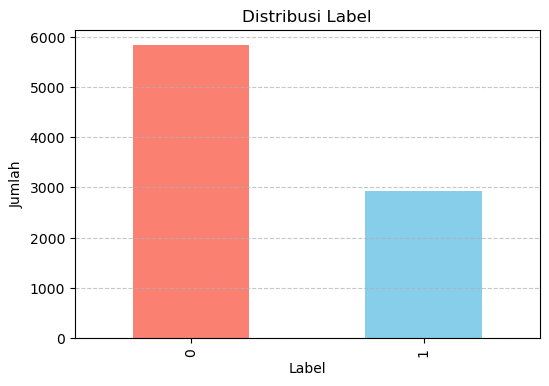

0    5852
1    2926
Name: Label, dtype: int64

In [74]:
final_combined_data['Label'].value_counts().plot(kind='bar', color=['salmon', 'skyblue'], figsize=(6, 4))
plt.title('Distribusi Label')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

final_combined_data['Label'].value_counts()

Berikut adalah sebaran distribusi label `0` (berinteraksi) dan `1` (tidak berinterasi):
   - `0` sebanyak **5.852 data** 
   - `1` sebanyak **2.926 data**

Metode yang digunakan dalam penanganan **_imbalance data_** ini adalah **_over-sampling_** menggunakan teknik **SMOTE (Synthetic Minority Over-sampling Technique)** yang dikembangkan oleh [Chawla et al, 2002](https://dl.acm.org/doi/10.5555/1622407.1622416) 

**SMOTE** adalah teknik **_oversampling_** yang digunakan untuk **menambah jumlah sampel pada kelas minoritas** secara sintetis. **SMOTE** menciptakan data baru dengan **menginterpolasi sampel yang sudah ada** berdasarkan **k-tetangga terdekat (k-nearest neighbors)**

#### Langkah-Langkahnya adalah:

#### 1. Pisahkan Fitur (x) dan Label (y)
Proses ini menghapus kolom non-numerik (`Protein_ID` dan `Compound_ID`)

In [2]:
X = final_data.drop(['Label', 'Protein_ID', 'Compound_ID'], axis=1)  
y = final_data['Label']  

#### 2. Terapkan SMOTE untuk _oversampling_ Data Positif

In [ ]:
# Terapkan SMOTE pada dataset penuh
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

#### 3. Cek Distribusi Label Sebelum dan Sesudah SMOTE

In [9]:
print('Distribusi label sebelum SMOTE:', Counter(y))
print('Distribusi label setelah SMOTE:', Counter(y_res))

Distribusi label sebelum SMOTE: Counter({0: 5852, 1: 2926})
Distribusi label setelah SMOTE: Counter({1: 5852, 0: 5852})


Setelah dilakukan proses SMOTE distribusi data menjadi _balance_ yakni:
   - `0` sebanyak **5.852 data** 
   - `1` sebanyak **5.852 data**

#### 4. Membuat Data Baru Hasil SMOTE

In [10]:
final_data = pd.concat([pd.DataFrame(X_res), pd.Series(y_res, name='Label')], axis=1)

In [11]:
final_data

,hsa10,hsa100,hsa10056,hsa1017,hsa1018,hsa10188,hsa1019,hsa1020,hsa1021,hsa1022,...,D04197,D04292,D04966,D04983,D05341,D05353,D05407,D05458,D06238,Label
0,1.000000,0.025752,0.021575,0.019325,0.026672,0.015293,0.023486,0.024367,0.022866,0.019767,...,0.196078,0.140351,0.019231,0.039216,0.033333,0.166667,0.215686,0.122449,0.203390,1
1,1.000000,0.025752,0.021575,0.019325,0.026672,0.015293,0.023486,0.024367,0.022866,0.019767,...,0.097561,0.113636,0.027778,0.088235,0.069767,0.317073,0.150000,0.147059,0.250000,1
2,0.025752,1.000000,0.018325,0.025940,0.027021,0.018789,0.020570,0.024986,0.019592,0.022743,...,0.071429,0.030303,0.000000,0.222222,0.192308,0.026316,0.107143,0.090909,0.025641,1
3,0.025752,1.000000,0.018325,0.025940,0.027021,0.018789,0.020570,0.024986,0.019592,0.022743,...,0.440000,0.333333,0.000000,0.037037,0.027778,0.097561,0.275862,0.071429,0.095238,1
4,0.021575,0.018325,1.000000,0.016285,0.020771,0.008854,0.017779,0.016979,0.016272,0.017750,...,0.074074,0.100000,0.050000,0.400000,0.153846,0.151515,0.111111,0.533333,0.181818,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11699,0.024346,0.018216,0.019291,0.018234,0.020749,0.014449,0.020816,0.018634,0.019561,0.017276,...,0.150000,0.111111,0.000000,0.055556,0.044444,0.341463,0.205128,0.142857,0.272727,1
11700,0.019777,0.018063,0.016827,0.022966,0.023763,0.013883,0.018367,0.022507,0.020280,0.018392,...,0.166667,0.218182,0.037736,0.122449,0.163636,0.263158,0.207547,0.117647,0.237288,1
11701,0.018323,0.016836,0.013239,0.015112,0.016072,0.012489,0.016615,0.020355,0.017417,0.020438,...,0.095890,0.105263,0.043478,0.043478,0.065789,0.219178,0.109589,0.121212,0.200000,1
11702,0.026959,0.019298,0.022743,0.268238,0.272031,0.043061,0.225573,0.250866,0.227815,0.231554,...,0.090909,0.185185,0.000000,0.000000,0.000000,0.254545,0.089286,0.102041,0.206897,1


Berhasil membuat data baru Hasil SMOTE dengan variabel `final_data`

In [40]:
final_data = pd.read_csv('final_data_smote.csv')

## Pembagian Data Training, Data Testing dan Data Validation

Pembagian data menjadi **Training**, **Testing**, dan **Validation** merupakan langkah penting dalam proses pembangunan model **_machine learning_**. 

Tujuan utamanya adalah memastikan bahwa model yang dibangun dapat **mempelajari pola** dari data dengan baik, **menghindari _overfitting_**, dan **menggeneralisasi** performa terhadap data baru yang belum pernah dilihat sebelumnya.

Berikut adalah penjelasan setiap data:

- **_Training_ Data** : Digunakan untuk **melatih model** agar dapat mempelajari pola berdasarkan data yang diberikan.  

- **_Validation_ Data** : Digunakan untuk **mengevaluasi model** selama pelatihan. Validation data membantu dalam melakukan **_hyperparameter tuning_** dan **pengujian model** sebelum dihadapkan pada data baru. Data ini juga memeriksa apakah model mengalami **_overfitting_** atau **_underfitting_**.  

- **_Testing_ Data** : Digunakan untuk **pengujian akhir model** dengan data yang **belum pernah dilihat sebelumnya**. Tujuannya adalah mengukur **kinerja model** secara obyektif setelah model selesai dilatih dan divalidasi. Data ini juga mengukur metrik performa seperti akurasi, presisi, _recall_ atau **F1-score**.

#### Mendefenisikan Fitur (x) dan Label (y)

In [41]:
X = final_data.drop(columns=['label'])
y = final_data['label']

#### Membagi data menjadi Training (70%)

In [42]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

#### Membagi Sisa Data menjadi Validation (20%) dan Testing (10%)

In [43]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42)

#### Menampilkan Hasil Pembagian Data

In [44]:
print(f"Training: {len(X_train)}, Validation: {len(X_val)}, Testing: {len(X_test)}")

Training: 8192, Validation: 2458, Testing: 1054


Berdasarkan _output_ diatas :
- Komposisi 70%
    - Data _Training_ sebanyak **8.192 data** 
- Komposisi 30% (masing-masing 50%)
    - Data _Validation_ sebanyak **2.458 data**
    - Data _Testing_ sebanyak **1.054 data**
    

## Data Transformation
**Data Transformation** adalah proses mengubah data ke dalam format yang lebih sesuai untuk analisis atau pelatihan model _machine learning_. 

Tujuannya adalah untuk **meningkatkan performa model** dengan menghilangkan skala yang tidak konsisten, distribusi yang tidak normal, atau _outlier_ yang ekstrem.

#### Penerapan Power Transformer

Berdasarkan analisis pada **Data Visualization** ditemukan bahwa persebaran data pada `compound_data` dan `protein_data`**sangat miring ke kanan (_positively skewed_)** Sehingga dilakukan Transformasi Data

Pada proses ini dilakukan Transformasi Data dengan menggunakan **PowerTransformer (Yeo-Johnson)** yang bertujuan untuk **menormalkan distribusi**, sehingga fitur menjadi lebih **simetris** dan **stabil**, yang diharapkan dapat meningkatkan performa model.

Berikut adalah penerapannya:

In [45]:
transformer = PowerTransformer(method='yeo-johnson')  
X_train = transformer.fit_transform(X_train)
X_val = transformer.transform(X_val)
X_test = transformer.transform(X_test)

Berhasil menerapkan Transformasi Data **PowerTransformer (Yeo-Johnson)**

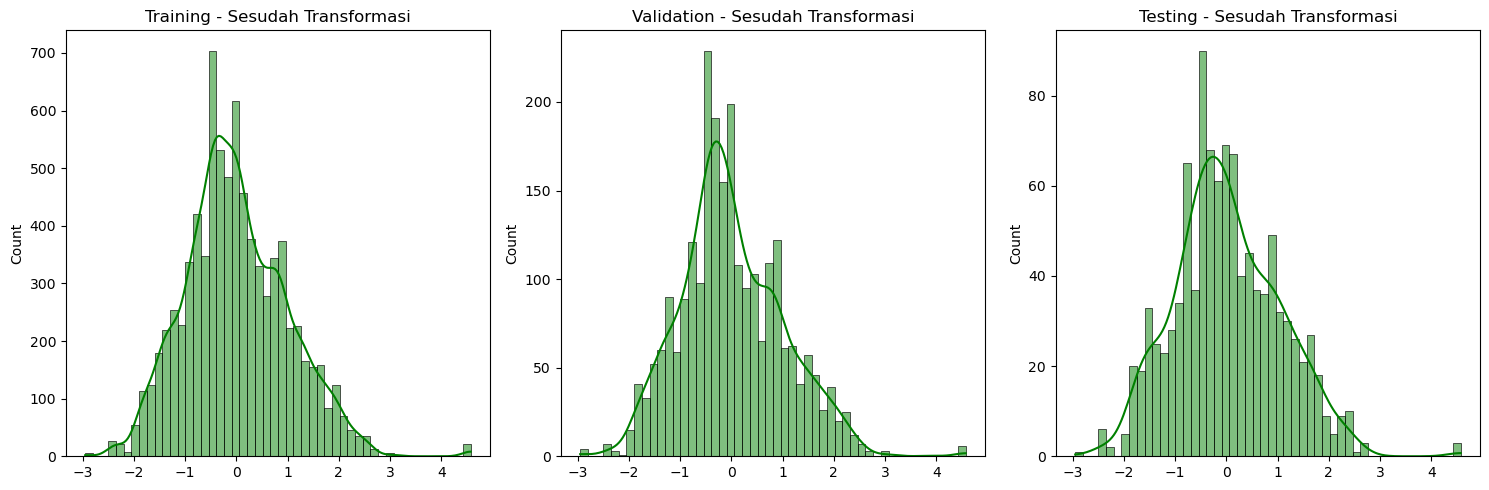

In [46]:
plt.figure(figsize=(15, 5))

# Training
plt.subplot(1, 3, 1)
sns.histplot(X_train[:, 0], bins=50, kde=True, color='green')
plt.title('Training - Sesudah Transformasi')

# Validation
plt.subplot(1, 3, 2)
sns.histplot(X_val[:, 0], bins=50, kde=True, color='green')
plt.title('Validation - Sesudah Transformasi')

# Testing
plt.subplot(1, 3, 3)
sns.histplot(X_test[:, 0], bins=50, kde=True, color='green')
plt.title('Testing - Sesudah Transformasi')

plt.tight_layout()
plt.show()

Gambar di atas menampilkan distribusi fitur protein dan _compound_ pada data **Training**, **Validation**, dan **Testing** setelah diterapkan **PowerTransformer (Yeo-Johnson)**. Distribusi yang sebelumnya **sangat miring (_skewed_)** kini telah berubah menjadi lebih **simetris** dan mendekati **distribusi normal (Gaussian)**. 

# Model Development

Pada bagian ini, proses akan diterapkan untuk membangun model _machine learning_ yang dapat memprediksi interaksi antara protein dan senyawa. Beberapa algoritma yang digunakan mencakup metode klasik dan _deep learning_ sebagai **_baseline_** percobaan berikut adalah algoritma yang diguunakan:

**1. Random Forest**

Random Forest adalah algoritma berbasis _ensemble_ yang **membangun banyak pohon keputusan** dan menggabungkan hasilnya untuk meningkatkan akurasi dan mengurangi _overfitting_.

**Kelebihan:**
- Dapat menangani data dengan dimensi tinggi dan fitur yang banyak.
- Tidak memerlukan banyak _preprocessing_, seperti normalisasi atau _scaling_.
- Tahan terhadap _overfitting_, terutama untuk dataset besar.

**Kekurangan:**
- Cenderung lambat untuk dataset besar dengan banyak pohon.
- Kurang efektif dalam menangani data yang sangat _sparse_.

**2. K-Nearest Neighbors (KNN)**

KNN adalah algoritma yang bekerja berdasarkan **kedekatan jarak antar data** untuk menentukan kelas atau nilai prediksi.

**Kelebihan:**
- Mudah diimplementasikan dan intuitif.
- Cocok untuk dataset yang ukurannya kecil hingga sedang.

**Kekurangan:**
- Sensitif terhadap outlier dan skala data (memerlukan normalisasi).
- Proses prediksi lambat untuk dataset besar karena memerlukan perhitungan jarak untuk setiap data.

**3. Stacked Autoencoder Deep Neural Network (SAE DNN)**

SAE DNN adalah pendekatan **_deep learning_ yang menggunakan _autoencoder_ untuk mereduksi dimensi dan mengekstrak fitur** sebelum diterapkan ke jaringan saraf dalam.

**Kelebihan:**
- Mampu menangkap hubungan non-linear yang kompleks dalam data.
- Cocok untuk data berdimensi tinggi dan kompleks.
- Menghasilkan fitur yang terkompresi dan relevan melalui proses _encoding_.

**Kekurangan:**
- Membutuhkan waktu pelatihan yang lebih lama dan sumber daya komputasi yang lebih besar.
- Memerlukan tuning parameter yang rumit untuk performa optimal.

**4. AdaBoost**

AdaBoost adalah algoritma _boosting_ yang menggabungkan beberapa model lemah (_weak learners_) untuk membentuk model yang kuat dengan meningkatkan bobot kesalahan.

**Kelebihan:**
- Memiliki performa yang baik untuk dataset dengan jumlah fitur yang besar.
- Mengurangi bias dan meningkatkan akurasi dibandingkan model tunggal.

**Kekurangan:**
- Rentan terhadap _noise_ dan _outlier_.
- Memerlukan waktu pelatihan yang lebih lama karena proses iteratif.

In [55]:
# Baseline Algoritma Random Forest
random_forest = RandomForestClassifier(n_estimators=10, random_state=42)
random_forest.fit(X_train, y_train)
rf_predictions = random_forest.predict(X_test)
rf_acc = accuracy_score(y_test, rf_predictions)
print(f'Akurasi Algoritma Random Forest: {rf_acc}')

Akurasi Algoritma Random Forest: 0.9222011385199241


Berdasarkan percobaan _baseline_ Algoritma diatas menghasilkan akurasi sebesar `92,20%`

In [57]:
# Baseline Algoritma KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_predictions)
print(f'Akurasi Algoritma KNN: {knn_acc}')

Akurasi Algoritma KNN: 0.849146110056926


Berdasarkan percobaan _baseline_ Algoritma diatas menghasilkan akurasi sebesar `84,91%`

In [59]:
# Baseline Algoritma SAE-DNN
def build_sae_dnn(input_shape, dropout_rate1=0.5, dropout_rate2=0.5, 
                  units1=1024, units2=512, units3=256, units4=128, 
                  learning_rate=0.001):
    # Input Layer
    inputs = Input(shape=(input_shape,))

    # SAE Model
    x = Dropout(dropout_rate1)(inputs)
    x = Dense(units1, activation='relu')(x)
    x = Dense(units2, activation='relu')(x)
    encoded = Dense(units3, activation='relu')(x)

    # DNN Model
    x = BatchNormalization()(encoded)
    x = Dropout(dropout_rate2)(x)
    x = Dense(units4, activation='relu')(x)
    x = Dropout(dropout_rate2)(x)
    outputs = Dense(1, activation='sigmoid')(x)  # Output Layer

    # Compile Model
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=learning_rate), 
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = build_sae_dnn(input_shape=X_train.shape[1])
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)
preds = (model.predict(X_test) > 0.5).astype(int)
saednn_acc = accuracy_score(y_test, preds)
print(f'Akurasi Algoritma SAE-DNN: {saednn_acc}')

Epoch 1/10
256/256 [==============================] - 3s 5ms/step - loss: 0.6904 - accuracy: 0.6653 - val_loss: 0.4662 - val_accuracy: 0.7510
Epoch 2/10
256/256 [==============================] - 1s 4ms/step - loss: 0.4964 - accuracy: 0.7620 - val_loss: 0.3823 - val_accuracy: 0.8072
Epoch 3/10
256/256 [==============================] - 1s 4ms/step - loss: 0.4180 - accuracy: 0.8064 - val_loss: 0.4053 - val_accuracy: 0.8303
Epoch 4/10
256/256 [==============================] - 1s 4ms/step - loss: 0.3873 - accuracy: 0.8254 - val_loss: 0.3784 - val_accuracy: 0.8454
Epoch 5/10
256/256 [==============================] - 1s 4ms/step - loss: 0.3514 - accuracy: 0.8486 - val_loss: 0.2921 - val_accuracy: 0.8706
Epoch 6/10
256/256 [==============================] - 1s 4ms/step - loss: 0.3298 - accuracy: 0.8555 - val_loss: 0.2945 - val_accuracy: 0.8820
Epoch 7/10
256/256 [==============================] - 1s 4ms/step - loss: 0.3022 - accuracy: 0.8717 - val_loss: 0.3057 - val_accuracy: 0.8792
Epoch 

Berdasarkan percobaan _baseline_ Algoritma diatas menghasilkan akurasi sebesar `90,13%`

In [61]:
# Baseline Algoritma AdaBoost
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)
preds = ada_model.predict(X_test)
adab_acc = accuracy_score(y_test, preds)
print(f'Akurasi Algoritma AdaBoost: {adab_acc}')

Akurasi Algoritma AdaBoost: 0.8197343453510436


Berdasarkan percobaan _baseline_ Algoritma diatas menghasilkan akurasi sebesar `81,97%`

**Perbandingan Hasil Algoritma Baseline**

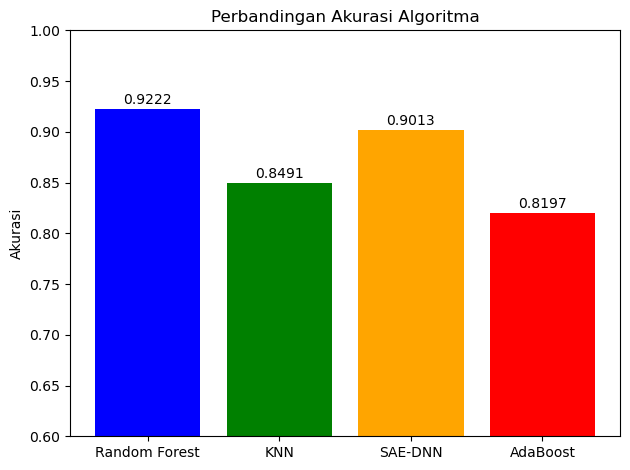

In [62]:
# Data akurasi dan warna
algorithms = ['Random Forest', 'KNN', 'SAE-DNN', 'AdaBoost']
accuracies = [rf_acc, knn_acc, saednn_acc, adab_acc]
colors = ['blue', 'green', 'orange', 'red']

# Membuat grafik
plt.bar(algorithms, accuracies, color=colors)
plt.title('Perbandingan Akurasi Algoritma')
plt.ylabel('Akurasi')
plt.ylim(0.6, 1.0)

# Menampilkan nilai akurasi di atas setiap bar
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.005, f'{acc:.4f}', ha='center')

plt.tight_layout()
plt.show()

Berdasarkan hasil perbandingan percobaan _baseline_ diatas dihasilkan:
- Algoritma Random Forest = `92,22%`
- Algoritma KNN = `84,91%`
- Algoritma SAE-DNN = `90,13%`
- Algoritma AdaBoost = `81,97%`

Sehingga terpilih algoritma **Random Forest** (_Ensemble Based_) untuk dapat dilakukan _Tunning Hyperparameter_ 

Pada proses Tunning Hyperparameter dilakukan pencarian parameter terbaik untuk model menggunakan metode **GridSearchCV**. _Hyperparameter tuning_ bertujuan untuk meningkatkan kinerja model dengan mencoba berbagai kombinasi parameter yang telah ditentukan sebelumnya. 

**GridSearchCV** digunakan karena memungkinkan eksplorasi sistematis dari kombinasi parameter yang telah ditentukan sebelumnya dengan proses yang terstruktur dan otomatis. 

Beberapa parameter yang dituning dalam algoritma **Random Forest** meliputi:
- **`n_estimators`:** Jumlah pohon keputusan dalam model.
- **`max_depth`:** Kedalaman maksimum setiap pohon keputusan.
- **`min_samples_split`:** Jumlah minimum sampel yang diperlukan untuk membagi node.
- **`min_samples_leaf`:** Jumlah minimum sampel yang harus dimiliki oleh daun pohon.

In [26]:
# Parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Evaluasi pada X_val
best_rf = grid_search.best_estimator_
preds = best_rf.predict(X_val)
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Random Forest Akurasi (Tuned) pada Validation: {accuracy_score(y_val, preds):.4f}')

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Akurasi (Tuned) pada Validation: 0.9426


Setelah dilakukan _hyperparameter tuning_ didapatkan kombinasi yang terbaik yakni:
- `max_depth`: 30
- `min_samples_leaf`: 1
- `min_samples_split`: 2 
- `n_estimators`: 200

Berikut ini adalah penjelasan dari keempat parameter tersebut:

- `max_depth`: 30 Ini menentukan kedalaman maksimum pohon. Dalam kasus ini, pohon tidak akan tumbuh lebih dari 30 tingkat. Kedalaman yang lebih besar bisa meningkatkan keakuratan model tetapi juga meningkatkan risiko _overfitting_.

- `min_samples_leaf`: 1 Ini adalah jumlah sampel minimum yang diperlukan untuk menjadi daun pohon. Jadi, setiap daun harus memiliki setidaknya 2 sampel. Parameter ini membantu mengontrol _overfitting_ dengan memastikan bahwa daun tidak terlalu spesifik hanya pada sampel pelatihan.

- `min_samples_split`: 2, Ini menunjukkan jumlah sampel minimum yang diperlukan untuk membagi simpul internal. Sebuah simpul akan dibagi jika memiliki 2 atau lebih sampel. Ini juga membantu mencegah _overfitting_ dengan memastikan bahwa pembagian tidak terlalu spesifik.

- `n_estimators`: 200 Ini menunjukkan jumlah pohon dalam forest. Di sini, model akan menggunakan 200 pohon. Biasanya, semakin banyak pohon, semakin stabil prediksi model, tetapi juga akan membutuhkan lebih banyak waktu komputasi dan memori.

Hasil dari `GridSearch` tersebut digunakan sebagai _hyperparameter_ untuk mengevaluasi model **Random Forest** tersebut.

# Evaluasi

Proses Evaluasi ini akan **Mengevaluasi Performa hasil dari _tuning hyperparameter_** dengan `Accuracy`, `Precision`, `Recall`, dan `F1 Score` dari **Confusion Matrix**

**Confusion Matrix** adalah metrik yang memberikan gambaran performa model dengan menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas. 

**Metrik yang dievaluasi** dari _Confusion Matrix_ meliputi:
- **True Positive (TP):** Jumlah prediksi positif yang benar.
- **True Negative (TN):** Jumlah prediksi negatif yang benar.
- **False Positive (FP):** Jumlah prediksi positif yang salah (_false alarm_).
- **False Negative (FN):** Jumlah prediksi negatif yang salah (_missed detection_).

Dari hasil _Confusion Matrix_, dilakukan beberapa **Metode metrik evaluasi** untuk mengukur performa model terhadap _Data Testing_ yang meliputi:  

1. **Akurasi**  
   Mengukur proporsi prediksi yang benar dibandingkan total prediksi.  

   $$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$  

2. **Presisi (Precision)**  
   Mengukur ketepatan prediksi positif yang benar.  

   $$Precision = \frac{TP}{TP + FP}$$  

3. **Recall (Sensitivitas)**  
   Mengukur kemampuan model menangkap semua kasus positif yang sebenarnya.  

   $$Recall = \frac{TP}{TP + FN}$$  

4. **F1-Score**  
   Rata-rata harmonik antara presisi dan _recall_, memberikan keseimbangan antara kedua metrik ini.  

   $$F1\text{-}Score = \frac{2 \cdot Precision \cdot Recall}{Precision + Recall}$$
   
Berikut adalah implementasinya:

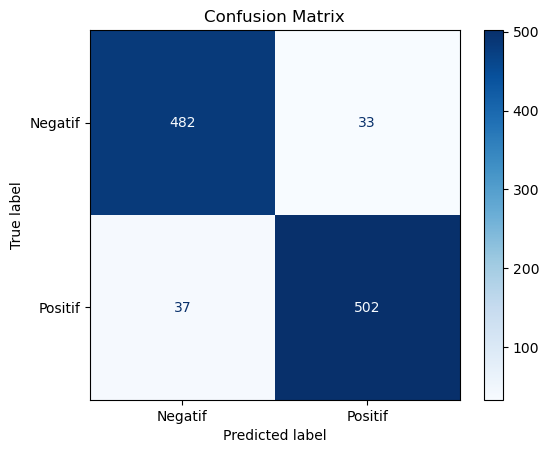

In [62]:
# Hitung confusion matrix dari Data Testing
preds = best_rf.predict(X_test)
cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negatif', 'Positif'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Berdasarkan grafik diatas berikut adalah Hasil _Confusion Matrix_ dari Permodelan Data _Testing_ yang totalnya berjumlah **1.054 Data**:

1. **True Negative (TN) - 482**  
   Model berhasil memprediksi **482 sampel negatif** dengan benar.

2. **False Positive (FP) - 33**  
   Model salah memprediksi **33 sampel negatif** sebagai **positif**.  
   Ini menunjukkan adanya beberapa kesalahan identifikasi negatif.

3. **False Negative (FN) - 37**  
   Model salah memprediksi **37 sampel positif** sebagai **negatif**.  
   Ini berarti ada beberapa interaksi yang sebenarnya **positif** tetapi tidak terdeteksi.

4. **True Positive (TP) - 502**  
   Model berhasil memprediksi **502 sampel positif** dengan benar.

In [63]:
# Testing X_test dengan parameter terbaik
best_rf = grid_search.best_estimator_
preds = best_rf.predict(X_test)
print('\n=== Classification Report ===')
print(classification_report(y_test, preds))
print(f'Akurasi Testing Random Forest: {accuracy_score(y_test, preds):.4f}')


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       515
           1       0.94      0.93      0.93       539

    accuracy                           0.93      1054
   macro avg       0.93      0.93      0.93      1054
weighted avg       0.93      0.93      0.93      1054

Akurasi Testing Random Forest: 0.9336


Dengan Akurasi terhadap data _testing_ adalah sebesar **93,36%** dengan _score_ lain:
- Precision : 93%
- Recall : 93% 
- F1-score: 93%

yang sebelumnya adalah **92,22%** (tanpa _hyperparameter tuning_)